### Purpose: Create a dataloader 

###### Date:11/13/2019

In [1]:
# Import libraries
from __future__ import print_function, division
import os
from skimage import io, transform
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import DataLoader, Dataset
# import torchvision
# from torchvision import transforms

print(torch.__version__)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

1.3.0


### Check the data catalog

In [2]:
data_root='/datadrive/UTC/'
place = 'Santa_Monica'
data_path=data_root+place+'/'

catalog_path = data_root+'data_catalog.csv'

data_catalog = pd.read_csv(catalog_path) 

data_catalog.head()

,raster_path,imagery_path,binary_path,place,tileID,suffix,img_size,res,pad,lat,...,img_src,lidar_src,band_means,band_stds,ndvi_mean,ndvi_std,ndvi_NaN,height_mean,height_std,height_NaN
0,/datadrive/UTC/Santa_Monica/combiTif/Santa_Mon...,/datadrive/UTC/Santa_Monica/NAIP/imagery/none/...,/datadrive/UTC/Santa_Monica/fullMasks/binary/S...,Santa_Monica,0,A,256,1,0,359712.0,...,naip1,USGS_LPC_CA_LosAngeles_2016_LAS_2018,"[18.891204833984375, 18.5040283203125, 17.6068...","[57.29494771343193, 56.12163180997879, 53.4039...",-0.094515,0.006674,59109,0.129057,0.209841,592
1,/datadrive/UTC/Santa_Monica/combiTif/Santa_Mon...,/datadrive/UTC/Santa_Monica/NAIP/imagery/none/...,/datadrive/UTC/Santa_Monica/fullMasks/binary/S...,Santa_Monica,1,A,256,1,0,359712.0,...,naip1,USGS_LPC_CA_LosAngeles_2016_LAS_2018,"[1.288421630859375, 1.2667694091796875, 1.2102...","[15.699684914668946, 15.430954788947341, 14.73...",-0.092167,0.028384,65095,0.347044,1.274629,6
2,/datadrive/UTC/Santa_Monica/combiTif/Santa_Mon...,/datadrive/UTC/Santa_Monica/NAIP/imagery/none/...,/datadrive/UTC/Santa_Monica/fullMasks/binary/S...,Santa_Monica,2,A,256,1,0,359968.0,...,naip1,USGS_LPC_CA_LosAngeles_2016_LAS_2018,"[13.987213134765625, 13.629104614257812, 13.28...","[48.43713477757454, 47.19827194378038, 46.0044...",-0.055390,0.009834,60489,-0.036909,0.300037,0
3,/datadrive/UTC/Santa_Monica/combiTif/Santa_Mon...,/datadrive/UTC/Santa_Monica/NAIP/imagery/none/...,/datadrive/UTC/Santa_Monica/fullMasks/binary/S...,Santa_Monica,3,A,256,1,0,359968.0,...,naip1,USGS_LPC_CA_LosAngeles_2016_LAS_2018,"[153.93601989746094, 150.54244995117188, 145.7...","[68.06969366741113, 66.21124215271861, 63.1174...",-0.075629,0.040046,9569,0.269359,1.552605,0
4,/datadrive/UTC/Santa_Monica/combiTif/Santa_Mon...,/datadrive/UTC/Santa_Monica/NAIP/imagery/none/...,/datadrive/UTC/Santa_Monica/fullMasks/binary/S...,Santa_Monica,4,A,256,1,0,359968.0,...,naip1,USGS_LPC_CA_LosAngeles_2016_LAS_2018,"[82.99894714355469, 83.22972106933594, 83.4470...","[74.19453890950487, 73.54065359071565, 72.8486...",-0.027280,0.144895,24177,5.150508,9.644906,0


In [3]:
count_row = data_catalog.shape[0]
print(count_row)

for i in range(count_row):
    print(data_catalog.iloc[i, 2])

391
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00000.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00001.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00002.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00003.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00004.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00005.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00006.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00007.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00008.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00009.tif
/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00010.tif
/datad

In [4]:
# pd.set_option('display.max_colwidth', -1)

first_row = data_catalog[0:1]
first_row

for col in first_row.columns: 
    print(col)
    dfList = list(first_row[col])
    print(dfList)
    print()

raster_path
['/datadrive/UTC/Santa_Monica/combiTif/Santa_Monica_naip1_A_1m_p0_tile00000.tif']

imagery_path
['/datadrive/UTC/Santa_Monica/NAIP/imagery/none/Santa_Monica_naip1_A_1m_p0_tile00000.tif']

binary_path
['/datadrive/UTC/Santa_Monica/fullMasks/binary/Santa_Monica_naip1_A_1m_p0_bi4_tile00000.tif']

place
['Santa_Monica']

tileID
[0]

suffix
['A']

img_size
[256]

res
[1]

pad
[0]

lat
[359712.0]

long
[3766016.0]

img_src
['naip1']

lidar_src
['USGS_LPC_CA_LosAngeles_2016_LAS_2018']

band_means
['[18.891204833984375, 18.5040283203125, 17.606857299804688, 15.63140869140625]']

band_stds
['[57.29494771343193, 56.12163180997879, 53.4039093527262, 47.41815688747752]']

ndvi_mean
[-0.09451492322469428]

ndvi_std
[0.006673575490450547]

ndvi_NaN
[59109]

height_mean
[0.1290572827044224]

height_std
[0.20984095489037816]

height_NaN
[592]



In [25]:
# split the catlaog to train and valid data (70:30)

train_data_catalog = data_catalog[:273]
print(train_data_catalog.shape[0])

valid_data_catalog = data_catalog[273:]
print(valid_data_catalog.shape[0])

273
118


In [26]:
# create csvs with training and validation data

# train_data_catalog.to_csv('train_data_catalog.csv', index=False)
# valid_data_catalog.to_csv('valid_data_catalog.csv', index=False)

---------------------------------------------

In [5]:
### Kaggle approach

In [116]:
# create a dataset class for our Urban Tree Canopy dataset

class UrbanTreeDataset(Dataset):
    """Urban Tree Canopy dataset."""

    def __init__(self, csv_file, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.canopy_frame = pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.canopy_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        imagery_inpt = self.canopy_frame.loc[idx, 'imagery_path']
#         print(imagery_inpt)        
        imagery_inpt = io.imread(imagery_inpt)        
        imagery_inpt = np.array([imagery_inpt])
        inpt_img = imagery_inpt.astype('float').reshape(256, 256, 4)
#         print(inpt_img.shape)
            
            
        raster_inpt = self.canopy_frame.loc[idx, 'raster_path']
#         print(raster_inpt)    
        raster_inpt = io.imread(raster_inpt)        
        raster_inpt = np.array([raster_inpt])
        raster_inpt = raster_inpt.astype('float').reshape(256, 256, 2)
#         print(raster_inpt.shape)
        height_band = raster_inpt[0][0]
        ndvi_band = raster_inpt[0][1]
        
        
        targ = self.canopy_frame.loc[idx, 'binary_path']
#         print(targ)
        targ_img = io.imread(targ)        
        targ_img = np.array([targ_img])
        targ_img = targ_img.astype('float').reshape(256, 256)
#         print(targ_img.shape)

        
        sample = {'input': inpt_img, 'target': targ_img}
        
        if self.transform:
            sample = self.transform(sample)

        return sample

In [117]:
# load the dataset
train_catalog_path = 'train_data_catalog.csv'
valid_catalog_path = 'valid_data_catalog.csv'

train_canopy_dataset = UrbanTreeDataset(train_catalog_path)
valid_canopy_dataset = UrbanTreeDataset(valid_catalog_path)

In [118]:
# we can access and get data with index by __getitem__(index)
train_sample = train_canopy_dataset.__getitem__(10)
valid_sample = valid_canopy_dataset.__getitem__(10)

(256, 256, 4)
<class 'numpy.ndarray'>


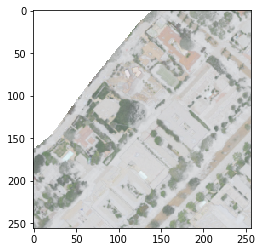

(256, 256, 4)
<class 'numpy.ndarray'>


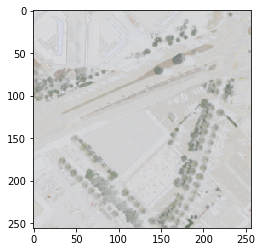

In [119]:
print(train_sample['input'].shape)
print(type(train_sample['input']))
plt.imshow(train_sample['input'].astype('uint8'))
plt.show()

print(valid_sample['input'].shape)
print(type(valid_sample['input']))
plt.imshow(valid_sample['input'].astype('uint8'))
plt.show()

(256, 256)
<class 'numpy.ndarray'>


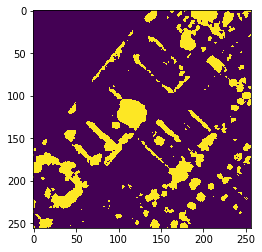

(256, 256)
<class 'numpy.ndarray'>


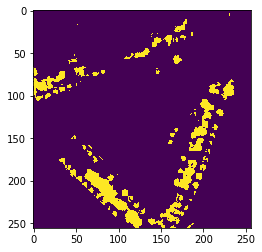

In [120]:
print(train_sample['target'].shape)
print(type(train_sample['target']))
plt.imshow(train_sample['target'])
plt.show()

print(valid_sample['target'].shape)
print(type(valid_sample['target']))
plt.imshow(valid_sample['target'])
plt.show()

### Use data loader in PyTorch that will accutually read the data within batch size and put into memory.

In [121]:
train_loader = DataLoader(train_canopy_dataset, batch_size=4, shuffle=True, num_workers=2)
print(type(train_loader))

valid_loader = DataLoader(valid_canopy_dataset, batch_size=4, shuffle=True, num_workers=2)

<class 'torch.utils.data.dataloader.DataLoader'>


In [122]:
# we can use dataloader as iterator by using iter() function.

train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>


In [123]:
# we can use dataloader as iterator by using iter() function.

valid_iter = iter(valid_loader)
print(type(valid_iter))

<class 'torch.utils.data.dataloader._MultiProcessingDataLoaderIter'>


In [124]:
# we can look at images and labels of batch size by extracting data .next() method.

train_sample = train_iter.next()
print()
print('input images shape on batch size = {}'.format(train_sample['input'].size()))
print('target images shape on batch size = {}'.format(train_sample['target'].size()))

valid_sample = valid_iter.next()
print()
print('input images shape on batch size = {}'.format(valid_sample['input'].size()))
print('target images shape on batch size = {}'.format(valid_sample['target'].size()))


input images shape on batch size = torch.Size([4, 256, 256, 4])
target images shape on batch size = torch.Size([4, 256, 256])

input images shape on batch size = torch.Size([4, 256, 256, 4])
target images shape on batch size = torch.Size([4, 256, 256])


--------------------------------

### Try to train model following kaggle tutorial

In [125]:
import pandas as pd
# from torch import np # Torch wrapper for Numpy

import os
from PIL import Image

import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
# from torchvision import transforms
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from sklearn.preprocessing import MultiLabelBinarizer

In [140]:
# Creating your Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(4, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(2304, 256)
        self.fc2 = nn.Linear(256, 2) # number of traget labels

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(x.size(0), -1) # Flatten layer
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.sigmoid(x)

model = Net() # On CPU
# model = Net().cuda() # On GPU


In [141]:
# Defining your training function

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [142]:
def train(epoch):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        # data, target = data.cuda(async=True), target.cuda(async=True) # On GPU
        data, target = Variable(data['input'].float()), Variable(data['target'].float())
        print(data.size())
        data = data.permute(0, 3, 1, 2) # bring channels first
        print(data.size())
        optimizer.zero_grad()
        output = model(data)
        loss = F.binary_cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

In [143]:
# Training your model

for epoch in range(1, 2):
    train(epoch)

torch.Size([4, 256, 256, 4])
torch.Size([4, 4, 256, 256])


RuntimeError: size mismatch, m1: [4 x 246016], m2: [2304 x 256] at /opt/conda/conda-bld/pytorch_1570910687650/work/aten/src/TH/generic/THTensorMath.cpp:197

### Try to train model following torch_kit repo readme

In [22]:
import torch_kit.train as train
import torch_kit.helpers as H

In [23]:
# get device
DEVICE=H.get_device()

# initialize model
model=H.get_model(
    net=NNModel,
    config=model_config,
    device=DEVICE )

NameError: name 'NNModel' is not defined